In [1]:
from fastai.vision.all import *
import pandas as pd

In [2]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/storage/data/pascal_2007/valid.json'),Path('/storage/data/pascal_2007/test.csv'),Path('/storage/data/pascal_2007/train.json'),Path('/storage/data/pascal_2007/segmentation'),Path('/storage/data/pascal_2007/test'),Path('/storage/data/pascal_2007/train'),Path('/storage/data/pascal_2007/test.json'),Path('/storage/data/pascal_2007/train.csv')]

In [3]:
df = pd.read_csv(path/'train.csv')
df.tail()

,fname,labels,is_valid
5006,009954.jpg,horse person,True
5007,009955.jpg,boat,True
5008,009958.jpg,person bicycle,True
5009,009959.jpg,car,False
5010,009961.jpg,dog,False


In [4]:
dls = ImageDataLoaders.from_df(df, path, seed=11, folder='train',
                              valid_col='is_valid', label_delim=' ',
                              item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

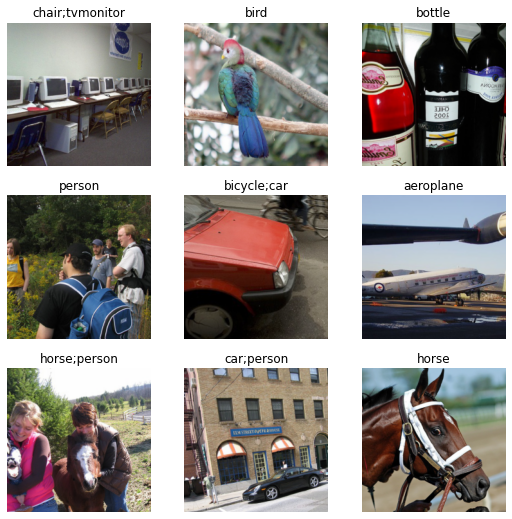

In [5]:
dls.show_batch()

In [6]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5), model_dir='/storage/models')

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.03981071710586548)

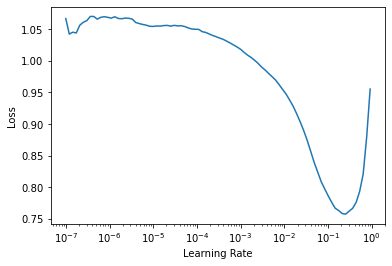

In [7]:
learn.lr_find()

In [8]:
learn.fine_tune(4, 4e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.399223,0.138855,0.955737,00:24


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.183772,5.282133,0.881514,00:30
1,0.195841,0.249254,0.923725,00:29
2,0.176007,0.134604,0.950398,00:30
3,0.148067,0.123370,0.955976,00:29


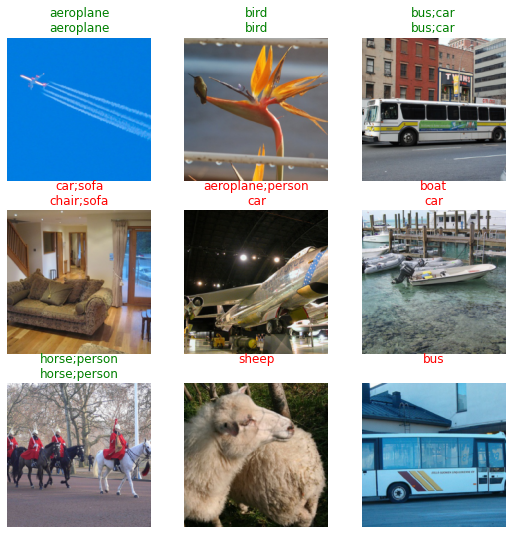

In [9]:
learn.show_results()

,target,predicted,probabilities,loss
0,chair;person,person,"tensor([6.1529e-33, 1.6387e-18, 7.5075e-35, 1.0329e-26, 8.0487e-10, 3.7352e-23,\n 1.4545e-24, 3.3549e-11, 2.4270e-14, 7.7877e-32, 6.0377e-12, 3.1605e-13,\n 1.5890e-19, 4.7071e-25, 1.0000e+00, 1.8803e-18, 4.8242e-14, 5.6465e-10,\n 2.1145e-10, 5.0568e-10])",1.5674772262573242
1,chair;diningtable;person,person,"tensor([6.2953e-15, 1.1416e-08, 2.6854e-15, 3.0755e-12, 2.3122e-04, 2.8851e-10,\n 6.3149e-11, 1.2399e-05, 8.5309e-07, 1.4111e-14, 5.9414e-06, 2.8730e-06,\n 5.0172e-09, 1.8050e-11, 1.0000e+00, 2.7197e-08, 1.0583e-06, 4.0312e-05,\n 3.5808e-05, 9.7056e-05])",1.300419569015503
2,bottle;person,person,"tensor([1.6043e-36, 1.0831e-20, 4.1561e-39, 4.5566e-30, 6.2035e-11, 3.9775e-26,\n 9.5832e-28, 2.1511e-12, 2.3763e-16, 8.8240e-36, 1.0196e-13, 8.1419e-15,\n 3.3084e-22, 5.4600e-28, 1.0000e+00, 1.0830e-20, 8.5294e-16, 1.1601e-11,\n 9.7310e-12, 1.6581e-11])",1.1751657724380493
3,bird;person,person,"tensor([1.9590e-11, 2.0327e-06, 2.9706e-10, 1.1915e-08, 1.4306e-03, 7.5006e-08,\n 5.7881e-08, 2.2736e-04, 4.3931e-05, 1.0028e-10, 3.1506e-04, 6.2419e-05,\n 2.1103e-06, 8.0211e-09, 1.0000e+00, 5.8661e-06, 2.6738e-05, 1.4745e-03,\n 4.6522e-04, 1.5564e-03])",1.0971359014511108
4,bottle;person,person,"tensor([2.8879e-29, 2.0437e-16, 9.2462e-31, 1.6417e-23, 5.5852e-09, 3.4338e-20,\n 1.5605e-21, 3.4781e-10, 1.1299e-12, 5.4070e-28, 2.8216e-10, 5.9006e-12,\n 3.9522e-17, 1.5851e-22, 1.0000e+00, 6.4744e-16, 2.2777e-12, 6.2855e-09,\n 4.3215e-09, 2.9650e-08])",0.950157642364502
5,dog;person,person,"tensor([6.8231e-20, 2.4854e-11, 1.9162e-20, 2.0657e-16, 2.8704e-06, 4.4267e-14,\n 7.0962e-15, 3.5637e-07, 6.0444e-09, 2.4816e-19, 1.0512e-07, 3.6478e-08,\n 6.4824e-12, 2.2243e-15, 1.0000e+00, 1.7491e-11, 5.8072e-09, 1.3330e-06,\n 7.0475e-07, 2.8606e-06])",0.856328010559082
6,chair;person,person,"tensor([6.9023e-16, 3.5407e-09, 5.1002e-16, 3.5797e-13, 4.4297e-05, 2.5891e-11,\n 6.4020e-12, 4.2322e-06, 3.4373e-07, 1.3369e-15, 1.9086e-06, 7.9988e-07,\n 1.9504e-09, 1.0720e-12, 1.0000e+00, 1.6427e-09, 1.6929e-07, 1.2723e-05,\n 1.1345e-05, 2.2171e-05])",0.7441758513450623
7,chair;diningtable;person,car;person,"tensor([0.0057, 0.0444, 0.0030, 0.1151, 0.0036, 0.4053, 0.6845, 0.0014, 0.0093,\n 0.0033, 0.0010, 0.0041, 0.0051, 0.0706, 0.8012, 0.0278, 0.0013, 0.0061,\n 0.2719, 0.0019])",0.7040928602218628
8,dog;horse;person,bicycle;person,"tensor([3.2441e-04, 9.3730e-01, 2.1233e-04, 1.2708e-03, 2.1300e-02, 3.4691e-02,\n 3.5585e-02, 2.8264e-04, 1.3763e-01, 8.0537e-05, 8.1072e-03, 1.6867e-03,\n 1.0959e-02, 4.5551e-02, 9.9632e-01, 3.3126e-02, 1.2478e-04, 1.1676e-02,\n 1.5033e-03, 3.0952e-03])",0.7009932994842529


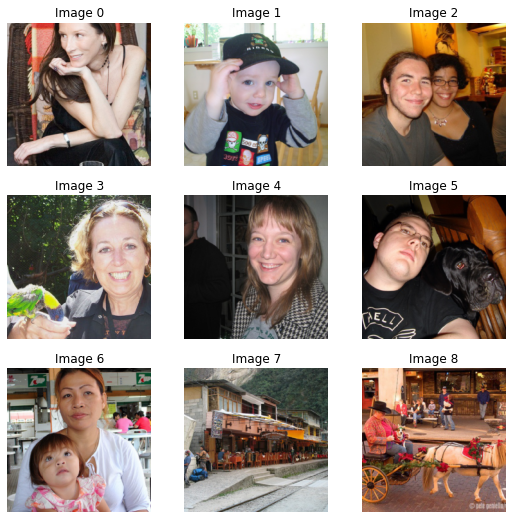

In [10]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)